# Homework 6 (100 Points)

The focus of this homework will be Network and Graphs as well as Neural Networks.

## Exercise 1 [50pts]

This exercise will focus on Neural Networks and visualization.

a) Write a function that takes a keras network and outputs an image (png format) of the network. [5pts]

You can assume the model is sequential and only uses dense layers. The output image for

```python
    model = keras.models.Sequential()
    model.add(layers.Dense(2, input_dim=2))
    model.add(layers.Dense(1))
    model.compile(loss="binary_crossentropy")
```

should look something like this

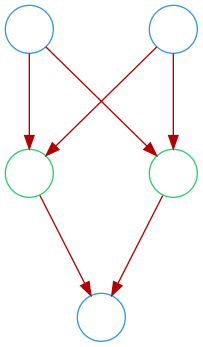

In [ ]:
from IPython.display import Image
Image(filename="example.png")

Hint: use the networkx library (specifically the [to_agraph](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_agraph.to_agraph.html) method)

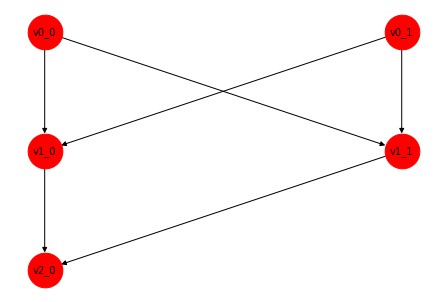

In [ ]:
import keras
import networkx as nx
from keras import layers
import matplotlib.pyplot as plt

model = keras.models.Sequential()
model.add(layers.Dense(2, input_dim=2))
model.add(layers.Dense(1))
model.compile(loss="binary_crossentropy")

model.get_config()['layers'][1]['config']['units']
def net2graph(model):
  edge_list = []
  vertex_list = []
  pos = dict()
  distance = 1
  x0, y0 = 0, 0
  G = nx.DiGraph()
  layers_dict = model.get_config()['layers']
  layers_num = len(layers_dict)
  for i in range(layers_num):
    if layers_dict[i]['class_name'] == 'InputLayer':
      units_num = layers_dict[i]['config']['batch_input_shape'][1]
    elif layers_dict[i]['class_name'] == 'Dense':
      units_num = layers_dict[i]['config']['units']
    for j in range(units_num):
      v = 'v'+str(i)+'_'+str(j)
      vertex_list.append('v'+str(i)+'_'+str(j))
      pos[v] = (x0+j, y0-i)
      if i != 0:
        vertex_num = len(vertex_list)
        for k in range(vertex_num):
          if int(vertex_list[k][1]) == i-1:
            edge_list.append((vertex_list[k],v))
  G.add_nodes_from(vertex_list)
  G.add_edges_from(edge_list)
  nx.draw(
        G,
        pos = pos,                      
        node_color = 'red',            
        edge_color = 'black',           
        with_labels = True,             
        font_size =10,                  
        node_size =1200                  
       )
  plt.savefig("Graph.png", format="PNG")
  plt.show()

net2graph(model)

b) Generate 100 datapoints of the form y = 3x + 1 + e where e ~ N(0, 1) and plot the data in a scatter plot [2.5pts]

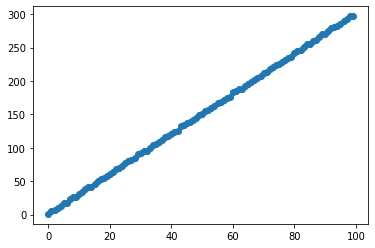

In [ ]:
import numpy as np

x = np.arange(0, 100)
y = 3*x+1+np.random.randn((100))
plt.figure()
plt.scatter(x, y)
plt.show()

c) Create a Neural Network with no hidden layers (just input to ouput each with just one neuron), using the `mean_squared_error` loss and no activation function. Create an image of this model using a) then train this model on the dataset from b). In a 3D plot, plot the weight, the bias, and the loss value. [5pts]

4/4 [==============================] - 0s 4ms/step - loss: 18318.2910


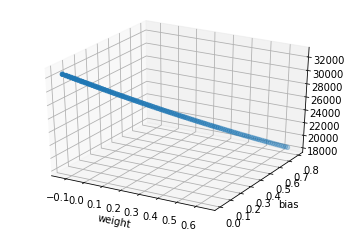

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#定义坐标轴
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.xlabel("weight")
plt.ylabel("bias")

model = keras.models.Sequential()
model.add(layers.Dense(1, input_dim=1))
model.compile(loss="mean_squared_error")
weights, bias, loss = [], [], []
for i in range(100):
  model.fit(x, y)
  weights.append(model.get_weights()[0][0][0])
  bias.append(model.get_weights()[1][0])
  loss.append(model.fit(x, y).__dict__['history']['loss'])

ax.scatter3D(weights,bias,loss, cmap='Blues')
plt.show()
#net2graph(model)

d) Using matplotlib animation, re-train the model from c) and create an animation of the weight, bias, and loss at each training epoch. [5pts]

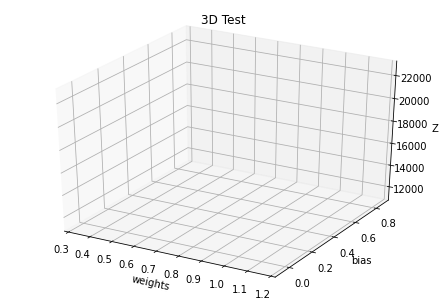

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation



def Gen_RandLine(length, dims=3):
    lineData = np.zeros((dims, length))
    for i in range(dims):
      for j in range(length):
        if i == 0:
          lineData[i][j] = weights[j]
        elif i == 1:
          lineData[i][j] = bias[j]
        else:
          lineData[i][j] = loss[j][0]

    return lineData   


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines 
data = [Gen_RandLine(100, 3)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data] 

# Setting the axes properties
ax.set_xlim3d([0.3, 1.2])
ax.set_xlabel('weights')

ax.set_ylim3d([-0.1, 0.9])
ax.set_ylabel('bias')

ax.set_zlim3d([11000, 23000])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 100, fargs=(data, lines),
                                   interval=50, blit=False)

plt.show()
line_ani.save('modelc.mp4', writer = 'ffmpeg', fps = 30)

e) Generate data of the form y = 3x^3 + 2x^2 + x + 1 + e where e ~ N(0, 1) and plot the data in a scatter plot [2.5pts]

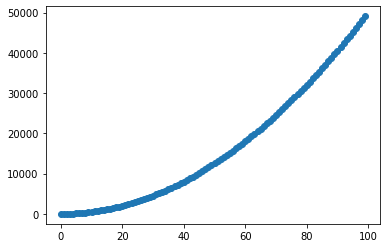

In [ ]:
import numpy as np

xe = np.arange(0, 100)
ye = 3*(xe**2)+2*(xe**2)+xe+1+np.random.randn((100))
plt.figure()
plt.scatter(xe, ye)
plt.show()

f) Create and train a neural network on the dataset from b) and plot the resulting curve through the scatter plot. (you can use any number of epochs, hidden layers etc.) Also create an image of the network using the function from a) [5pts]

4/4 [==============================] - 0s 4ms/step - loss: 2308.0359


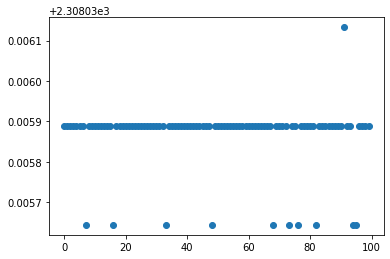

In [ ]:
modelf = keras.models.Sequential()
modelf.add(layers.Dense(4, input_dim=1))
modelf.add(layers.Dense(2))
modelf.add(layers.Dense(1))
modelf.compile(loss="binary_crossentropy")

weights, bias, loss = [], [], []
for i in range(100):
  modelf.fit(x, y)
  weights.append(modelf.get_weights()[0][0][0])
  bias.append(modelf.get_weights()[1][0])
  loss.append(modelf.fit(x, y).__dict__['history']['loss'])

epochs = np.arange(0, 100)
plt.figure()
plt.scatter(epochs, loss)
plt.show()


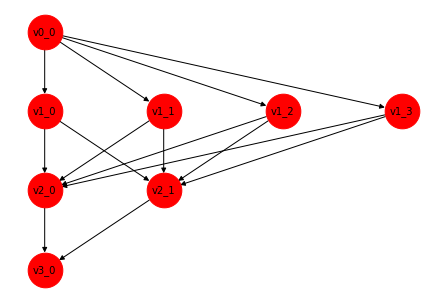

In [ ]:
net2graph(modelf)

g) Create an animation of the resulting curve from your model at each training epoch (up to 100 epochs). [5pts]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation



def Gen_RandLine(length, dims=2):
    lineData = np.zeros((dims, length))
    for i in range(dims):
      for j in range(length):
        if i == 0:
          lineData[i][j] = epochs[j]
        else:
          lineData[i][j] = loss[j][0]

    return lineData   


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        line.set_data(data[0:2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
#ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines 
data = [Gen_RandLine(100, 2)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1])[0] for dat in data] 

# Setting the axes properties
ax.set_xlim3d([0, 100])
ax.set_xlabel('epochs')

ax.set_ylim3d([2288.9970, 2288.9978])
ax.set_ylabel('loss')


# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 100, fargs=(data, lines), interval=50, blit=False)

plt.show()
line_ani.save('graph_g.mp4', writer = 'ffmpeg', fps = 30)

<Figure size 432x288 with 0 Axes>

h) Generate a classification dataset with a decision boundary between two classes that is a cosine function. Here is an example output: [5pts]

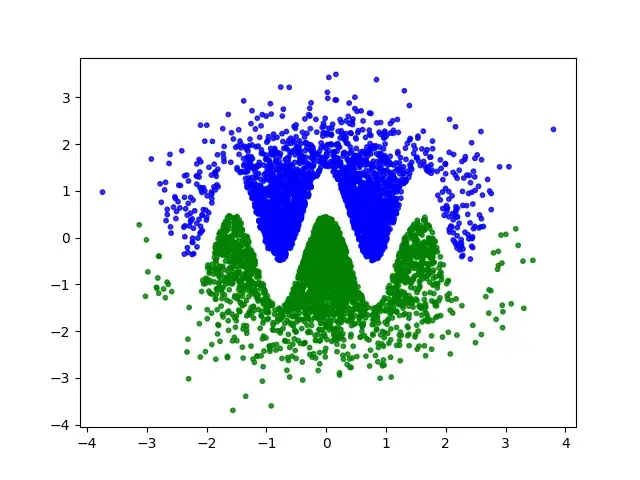

In [ ]:
from IPython.display import Image
Image(filename="cosine.png")

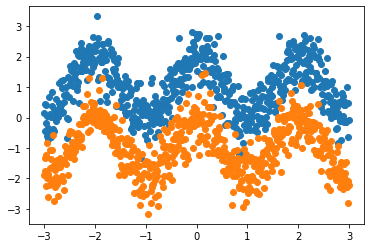

In [ ]:
x = np.arange(-3, 3, 0.01)
y_1 = np.cos(x*np.pi)+np.random.normal(loc=1.0, scale=0.5, size=(600))
y_2 = np.cos(x*np.pi)+np.random.normal(loc=-1.0, scale=0.5, size=(600))

plt.figure()
plt.scatter(x, y_1)
plt.scatter(x, y_2)
plt.show()

i) Describe in depth how you would choose:

- a number of hiden neurons
- the activation function

and describe the limitations you forsee given the periodic nature of the cosine function. [5pts]

In [ ]:
#hidden neurons: 4
#activation function: ReLU
#limitations: It is hard to generate a periodic decision bound.

j) Create and train a neural network of your choosing on the above dataset and plot the decision boundary. [5pts]

38/38 [==============================] - 1s 2ms/step - loss: 6.4552


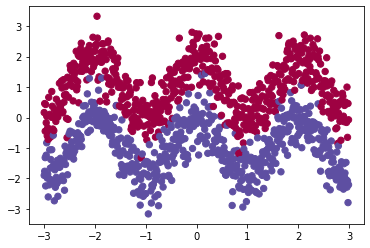

16383/16383 [==============================] - 20s 1ms/step


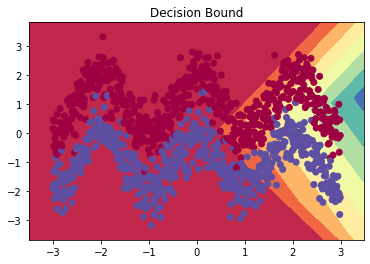

In [ ]:
import importlib.util
import struct
import sklearn
from sklearn import *

modelj = keras.models.Sequential()
modelj.add(layers.Dense(4, input_dim=2, activation='relu'))
modelj.add(layers.Dense(1, activation='relu'))
modelj.compile(loss="binary_crossentropy")

dataset = []
label = []
for i in range(600):
  dataset.append([x[i], y_1[i]])
  label.append(0)
  dataset.append([x[i], y_2[i]])
  label.append(1)

X = np.array(dataset)
y = np.array(label)
modelj.fit(dataset, label)

plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()
 
# 第二步 绘制决策边界
def plot_decision_boundary(pred_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
 
# 用预测函数预测一下
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
 
# 然后画出图
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
 
# 画一下决策边界
plot_decision_boundary(lambda x: modelj.predict(x))
plt.title("Decision Bound")
plt.show()


k) Double the range of the dataset - in the above example, the range of the data is roughly [-4, 4] so the target output would have a range of [-8, 8] but the boundary between the two classes should stay the same cosine function. You can increase the number of data points so that the space is roughly as dense as before. Then apply (without re-training) the network you got in j). Plot the decision boundary and comment on what you observe. [5pts]

100/100 [==============================] - 0s 2ms/step - loss: 5.7431


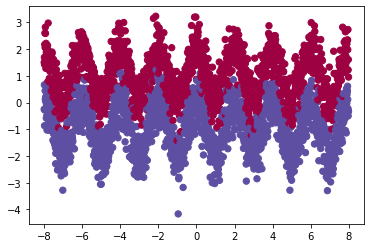

44599/44599 [==============================] - 53s 1ms/step


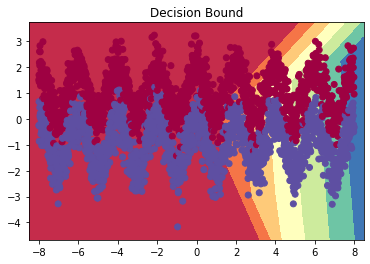

In [ ]:
x = np.arange(-8, 8, 0.01)
y_1 = np.cos(x*np.pi)+np.random.normal(loc=1.0, scale=0.5, size=(1600))
y_2 = np.cos(x*np.pi)+np.random.normal(loc=-1.0, scale=0.5, size=(1600))

dataset = []
label = []
for i in range(1600):
  dataset.append([x[i], y_1[i]])
  label.append(0)
  dataset.append([x[i], y_2[i]])
  label.append(1)

X = np.array(dataset)
y = np.array(label)
modelj.fit(dataset, label)

plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()
 
plot_decision_boundary(lambda x: modelj.predict(x))
plt.title("Decision Bound")
plt.show()


## Exercise 2 [50pts]

In this exercise, you will try to recommend new collaborations to researchers
of the Machine Learning community. Our approach will follow the guidelines of
collaborative filtering: “If your past behavior/preferences were similar
to some other user’s, your future behavior may be as well”. As an
example, imagine you like Rolling Stones, Beatles and Jimmy Hendrix. It turns
out that most people that like the aforementioned artists, are also fans of Eric
Clapton. Then, it is very likely that if you listen to Eric Clapton’s music, you
will like it as well.

In this assignment you will implement a recommendation system for suggesting new collaborations to Machine Learning researchers.

A network as a graph: A graph or network represents relationships among
different entities (users of a social network, researchers, products, etc.). Those
entities are represented as nodes and the relationships between them (friends
on Facebook, co-authors of a research paper, products purchased together) as
edges. When there is an edge between two nodes, x and y, we say that y is a
neighbor (or friend) of x (and also - as the graphs we consider are undirected -
x is also a neighbor of y).

Each line of `edges.txt` contains the names of two researchers that have co-authored a paper in one of the top Machine Learning conferences (NeurIPS, ICLR, ICML) between 2010 and 2016.

a) Write a function that reads the file `edges.txt` and create a
graph using NetworkX. (This is a tab-separated value (TSV) file, you may
use packages such as Pandas to read it.) [5pts]

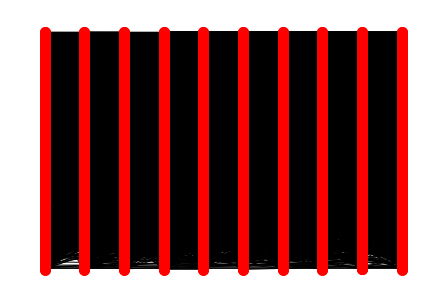

In [25]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_table("edges.txt", header=None)
edge_num = len(data)
edge_list = []
vertex_list = []
pos = dict()
distance = 1
G = nx.Graph()

for i in range(edge_num):
  v1 = data[0][i]
  v2 = data[1][i]
  if v1 not in vertex_list:
    vertex_list.append(v1)
    x = len(vertex_list) % 10
    y = len(vertex_list) / 10
    pos[v1] = (x, -y)
  if v2 not in vertex_list:
    vertex_list.append(v2)
    x = len(vertex_list) % 10
    y = len(vertex_list) / 10
    pos[v2] = (x, -y)
  edge_list.append((v1,v2))

G.add_nodes_from(vertex_list)
G.add_edges_from(edge_list)
nx.draw(
    G,
    pos = pos,                      
    node_color = 'red',             
    edge_color = 'black',           
    with_labels = False,             
    font_size =1,                  
    node_size =100                 
       )
plt.show()

b) Recommend by number of common friends. [10pts]

The intuition behind this recommendation algorithm is that if non-friend
Y is your friend’s friend, then maybe Y should be your friend too. If
person Y is the friend of many of your friends, then Y is an even better
recommendation.

Write a function `common_friends_number(G, X)` that, given G and an author
X, returns a list of recommendations for X. The authors in this list are sorted
by the number of common neighbors they have with X (and are not of course
already friends with X). **If there are ties, you can break them arbitrarily**.

In [38]:
def common_friends_number(G, X):
    common_friends = []
    common_friends_num = []
    friends = [n for n in G.neighbors(X)]
    friends_num = len(friends)
    for i in range(friends_num):
        new_friends = [n for n in G.neighbors(friends[i])]
        new_friends_num = len(new_friends)
        for j in range(new_friends_num):
            if new_friends[j] not in common_friends:
                common_friends.append(new_friends[j])
                common_friends_num.append(1)
            else:
                common_friends_num[common_friends.index(new_friends[j])] = common_friends_num[common_friends.index(new_friends[j])] + 1
                
    flag = True
    total_num = len(common_friends)
    
    while flag:
        flag = False
        for i in range(total_num-1):
            if common_friends_num[i] < common_friends_num[i+1]:
                temp = common_friends_num[i]
                common_friends_num[i] = common_friends_num[i+1]
                common_friends_num[i+1] = temp
                
                temp = common_friends[i]
                common_friends[i] = common_friends[i+1]
                common_friends[i+1] = temp
                
                if flag == False:
                    flag =True
    if X in common_friends:
        index_X = common_friends.index(X)
        common_friends.pop(index_X)
        common_friends_num.pop(index_X)
        
    print(common_friends)
    print(common_friends_num)
        
common_friends_number(G, 'Daniel Rueckert')

['Ben Glocker', 'Bernhard Kainz', 'Christina Malamateniou', 'Joseph V. Hajnal', 'Kevin Keraudren', 'Mary A. Rutherford', 'Matthew C. H. Lee', 'Amir Alansary', 'Bertrand Thirion', 'David J. Sharp', 'Emma C. Robinson', 'Fani Deligianni', 'Gaël Varoquaux', 'A. David Edwards', 'Alexandre Gramfort', 'Arthur Mensch', 'Danilo Bzdok', 'Elvis Dohmatob', 'Evelyn Eger', 'Jean-Baptiste Poline', 'Julien Mairal', 'Michael Eickenberg', 'Olivier Grisel', 'Vincent Michel', 'Yannick Schwartz', 'Eugene Belilovsky', 'Matthew B. Blaschko']
[7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]


c) Make recommendations using Jaccard’s Index. [10points]

If Γ(X) is the set of neighbors of X, then the metric we used in part (c), assigns to a non-friend y, the following recommendation score (with respect to X):

score(y) = |Γ(X)∩Γ(y)|.

Jaccard’s Index scales this score by taking into account the union of X and Y ’s neighbors. Intuitively, X and Y are more similar, if what they have in common is as close as possible to what they have together.

Write a function jaccard index(G, X) that given G and an author X, returns a
list of recommendations for X. The authors in this list are sorted by the number
of their Jaccard Index with respect to X (and are not of course already friends
with X). **If there are ties, you can break them arbitrarily**.

Jaccard Index = |Γ(X)∩Γ(y)| / |Γ(X)∪Γ(y)|

In [44]:
def common_friends_by_Jaccard(G, X):
    common_friends = []
    score = []
    friends = [n for n in G.neighbors(X)]
    friends_num = len(friends)
    for i in range(friends_num):
        new_friends = [n for n in G.neighbors(friends[i])]
        new_friends_num = len(new_friends)
        for j in range(new_friends_num):
            if new_friends[j] not in common_friends:
                common_friends.append(new_friends[j])
                ls = [n for n in G.neighbors(new_friends[j])]
                ls1 = list(set(friends).intersection(set(ls)))
                ls2 = list(set(friends).union(set(ls)))
                score.append(len(ls1)/len(ls2))
    
    total_num = len(common_friends)
    flag = True
    
    while flag:
        flag = False
        for i in range(total_num-1):
            if score[i] < score[i+1]:
                temp = score[i]
                score[i] = score[i+1]
                score[i+1] = temp
                
                temp = common_friends[i]
                common_friends[i] = common_friends[i+1]
                common_friends[i+1] = temp
                
                if flag == False:
                    flag =True
    
    if X in common_friends:
        index_X = common_friends.index(X)
        common_friends.pop(index_X)
        score.pop(index_X)
    
    print(common_friends)
    print(score)
        
common_friends_by_Jaccard(G, 'Daniel Rueckert')

['Ben Glocker', 'Bernhard Kainz', 'Christina Malamateniou', 'Joseph V. Hajnal', 'Kevin Keraudren', 'Mary A. Rutherford', 'Matthew C. H. Lee', 'Amir Alansary', 'David J. Sharp', 'Emma C. Robinson', 'Fani Deligianni', 'A. David Edwards', 'Bertrand Thirion', 'Gaël Varoquaux', 'Yannick Schwartz', 'Elvis Dohmatob', 'Jean-Baptiste Poline', 'Arthur Mensch', 'Danilo Bzdok', 'Evelyn Eger', 'Michael Eickenberg', 'Olivier Grisel', 'Vincent Michel', 'Alexandre Gramfort', 'Julien Mairal', 'Eugene Belilovsky', 'Matthew B. Blaschko']
[0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.19230769230769232, 0.17857142857142858, 0.14285714285714285, 0.13333333333333333, 0.13333333333333333, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.1, 0.07407407407407407, 0.06666666666666667, 0.043478260869565216]


d) What is:

- the density of the graph [5pts]
- the diameter of the graph [5pts]

In [51]:
density = 2*len(edge_list)/((len(vertex_list)-1)*len(vertex_list))
#diameter = nx.diameter(G) 
#there exists no diameter for that the graph G is not connected
density

0.0007646991511021018

e) Which author is the most central under:

- the degree centrality [5pts]
- the closeness centrality [5pts]
- betweeness centrality [5pts]

In [50]:
degree_centrality = nx.degree_centrality(G) 
closeness_centrality = nx.closeness_centrality(G)
betweeness_centrality = nx.betweenness_centrality(G) 
degree_centrality, closeness_centrality, betweeness_centrality

({'A. David Edwards': 0.0009337068160597573,
  'Daniel Rueckert': 0.002178649237472767,
  'A. P. Sarath Chandar': 0.0009337068160597573,
  'Amrita Saha': 0.0009337068160597573,
  'Balaraman Ravindran': 0.0009337068160597573,
  'Hugo Larochelle': 0.004668534080298786,
  'Mitesh M. Khapra': 0.0009337068160597573,
  'Stanislas Lauly': 0.0009337068160597573,
  'Vikas C. Raykar': 0.0010893246187363835,
  'A. Taylan Cemgil': 0.00046685340802987864,
  'Gaël Richard': 0.000778089013383131,
  'Aadirupa Saha': 0.00046685340802987864,
  'Shivani Agarwal 0001': 0.0020230314347961407,
  'Aaditya Ramdas': 0.000778089013383131,
  'Aarti Singh': 0.002178649237472767,
  'Arthur Gretton': 0.004201680672268907,
  'Dino Sejdinovic': 0.002334267040149393,
  'Javier Peña': 0.00046685340802987864,
  'Aapo Hyvärinen': 0.0003112356053532524,
  'Hiroshi Morioka': 0.0001556178026766262,
  'Aapo Kyrola': 0.00046685340802987864,
  'Carlos Guestrin': 0.0018674136321195146,
  'Danny Bickson': 0.00046685340802987864,